
**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---

# Distribuciones

In [1]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset

En la notebook *00* se explican los detalles de la siguiente sección.

In [2]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [3]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


### Definiciones Auxiliares

In [4]:
# Definiciones Auxiliares.
max_age = 99
max_salary = 200000
salary_col = 'salary_monthly_BRUTO'
# DF filtrado por edad.
df_age = df[df.profile_age < max_age]
# DF filtrado por salario.
df_salary = df[df[salary_col] < max_salary]

# Variables Categóricas


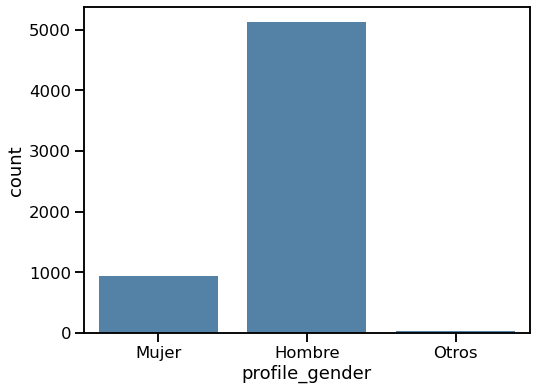

In [5]:
fig = plt.figure(figsize=(8, 6))
seaborn.countplot(x=df.profile_gender, color='steelblue');

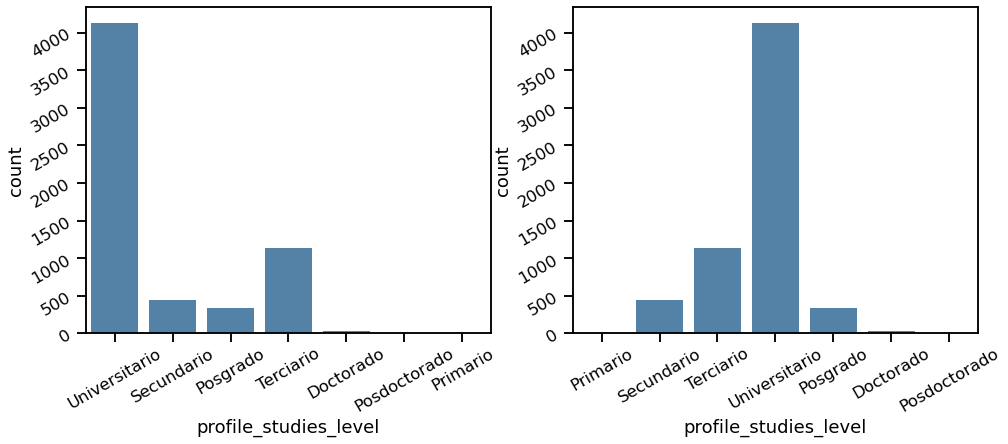

In [6]:
sorted_studies_levels = [ 'Primario'
                        , 'Secundario'
                        , 'Terciario'
                        , 'Universitario'
                        , 'Posgrado'
                        , 'Doctorado'
                        , 'Posdoctorado'
                        ]

fig, axes = plt.subplots(ncols=2, figsize=(16, 6))
seaborn.countplot(x=df.profile_studies_level, color='steelblue', ax=axes[0])
seaborn.countplot(x=df.profile_studies_level, color='steelblue', ax=axes[1], order=sorted_studies_levels)

for ax in axes:
  ax.tick_params(labelrotation=30)

# Variables Numéricas


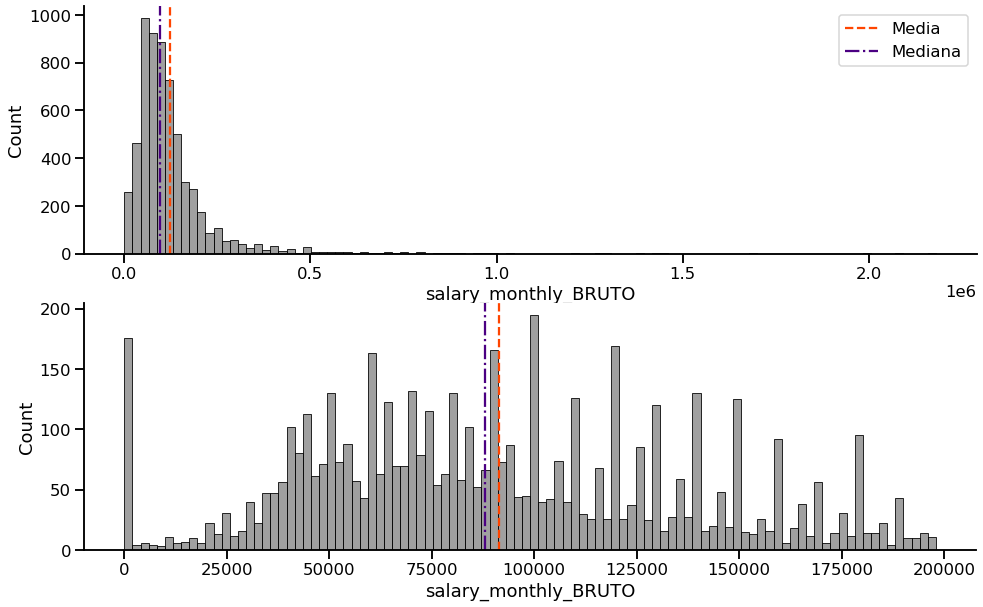

In [7]:
fig, axes = plt.subplots(nrows=2, figsize=(16, 10))

seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df[salary_col].mean(), color='orangered', linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo', linestyle='-.', label='Mediana')

seaborn.histplot(df_salary[salary_col], bins=100, ax=axes[1], color='gray')
axes[1].axvline(df_salary[salary_col].mean(), color='orangered', linestyle='--', label='Media')
axes[1].axvline(df_salary[salary_col].median(), color='indigo', linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

# Varias Variables

## Varias Categóricas

In [8]:
# Tabla de Contingencia

# Frecuencia
df_crosstab = pd.crosstab(df.profile_gender, df.profile_studies_level)
df_crosstab[sorted_studies_levels]

profile_studies_level,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado
profile_gender,,,,,,,
Hombre,2,424,970,3447,256,19,4
Mujer,0,24,158,667,85,8,0
Otros,0,1,7,19,1,3,0


In [9]:
# Tabla de Contingencia

# Proporción
df_crosstab = pd.crosstab(df.profile_gender, df.profile_studies_level,
                          normalize=True, margins=True, margins_name='Total')
df_crosstab[sorted_studies_levels + ['Total']]

profile_studies_level,Primario,Secundario,Terciario,Universitario,Posgrado,Doctorado,Posdoctorado,Total
profile_gender,,,,,,,,
Hombre,0.000328,0.069565,0.159147,0.565546,0.042002,0.003117,0.000656,0.840361
Mujer,0.000000,0.003938,0.025923,0.109434,0.013946,0.001313,0.000000,0.154553
Otros,0.000000,0.000164,0.001148,0.003117,0.000164,0.000492,0.000000,0.005086
Total,0.000328,0.073667,0.186218,0.678097,0.056112,0.004922,0.000656,1.000000


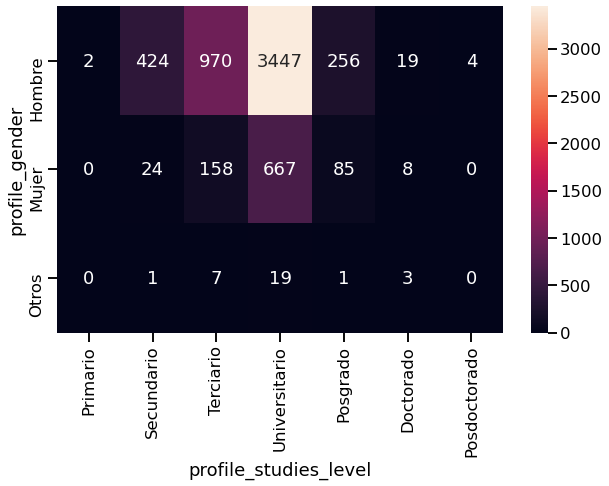

In [10]:
fig = plt.figure(figsize=(10, 6))

df_crosstab = pd.crosstab(df.profile_gender, df.profile_studies_level)[sorted_studies_levels]
seaborn.heatmap(df_crosstab, annot=True, fmt='g');

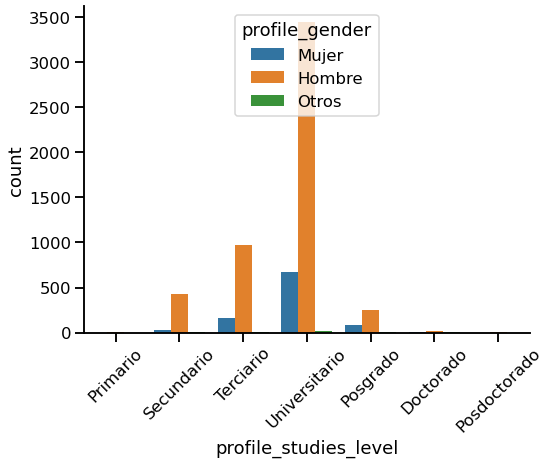

In [11]:
fig = plt.figure(figsize=(8, 6))

seaborn.countplot(x=df.profile_studies_level, hue=df.profile_gender, order=sorted_studies_levels)
plt.xticks(rotation=45)
seaborn.despine()

## Varias Numéricas

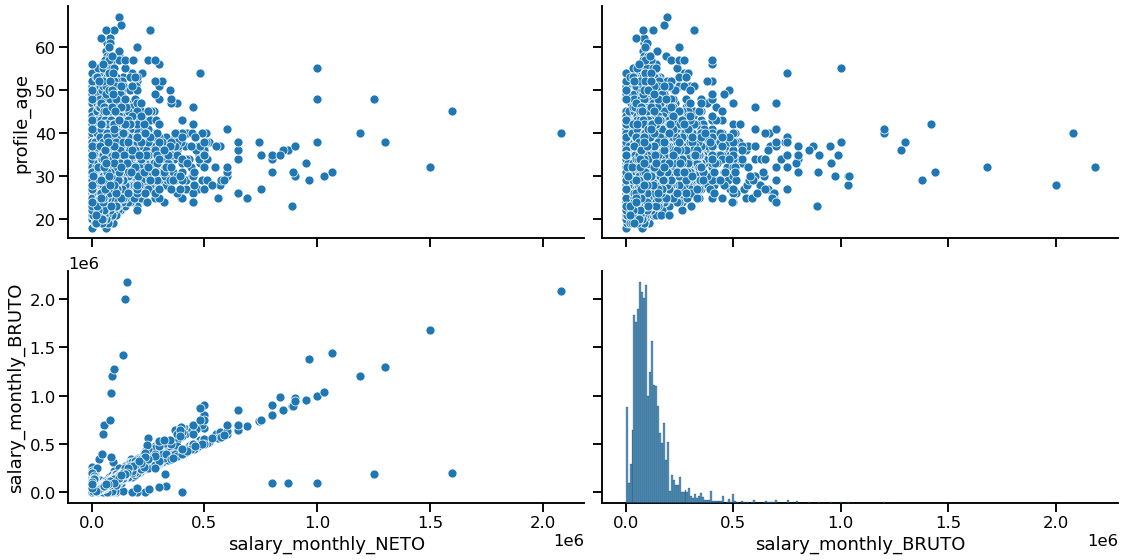

In [12]:
seaborn.pairplot(data=df_age,
                 x_vars=['salary_monthly_NETO', 'salary_monthly_BRUTO'],
                 y_vars=['profile_age', 'salary_monthly_BRUTO'],
                 aspect=2, height=4);

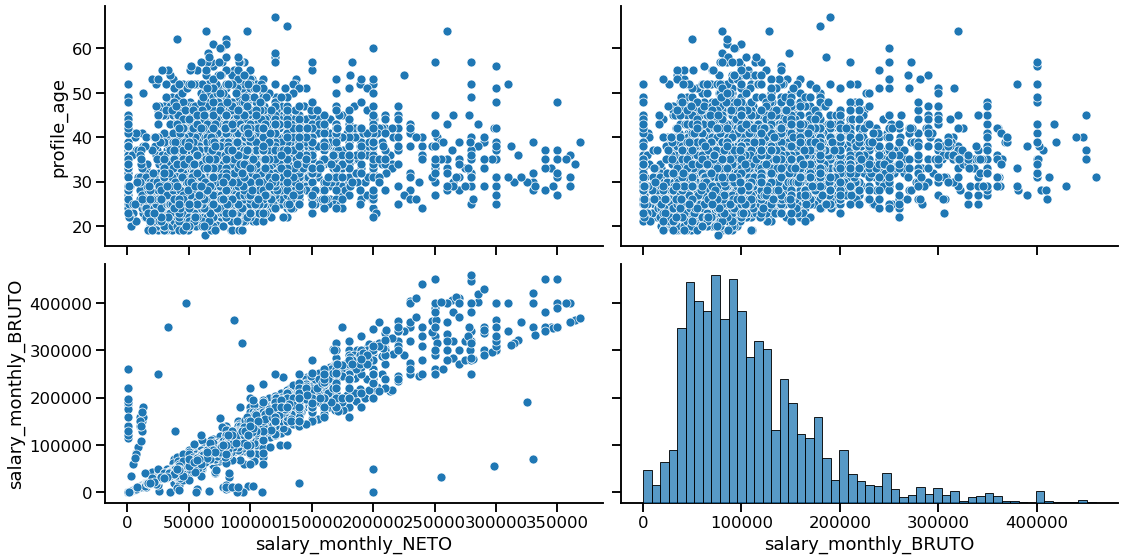

In [13]:
# Aplico un filtro para descartar salarios y edades anómalos/as.
max_limit_AGE = 99
min_limit_AGE = 10
max_limit_NETO = df['salary_monthly_NETO'].quantile(.98)
min_limit_NETO = df['salary_monthly_NETO'].quantile(.02)
max_limit_BRUTO = df['salary_monthly_BRUTO'].quantile(.98)
min_limit_BRUTO = df['salary_monthly_BRUTO'].quantile(.02)

filtered_df = df[ (df.salary_monthly_NETO < max_limit_NETO)
                & (df.salary_monthly_NETO > min_limit_NETO)
                & (df.salary_monthly_BRUTO < max_limit_BRUTO)
                & (df.salary_monthly_BRUTO > min_limit_BRUTO)
                & (df.profile_age < max_limit_AGE)
                & (df.profile_age > min_limit_AGE)
                ]

seaborn.pairplot(data=filtered_df,
                 x_vars=['salary_monthly_NETO', 'salary_monthly_BRUTO'],
                 y_vars=['profile_age', 'salary_monthly_BRUTO'],
                 aspect=2, height=4);

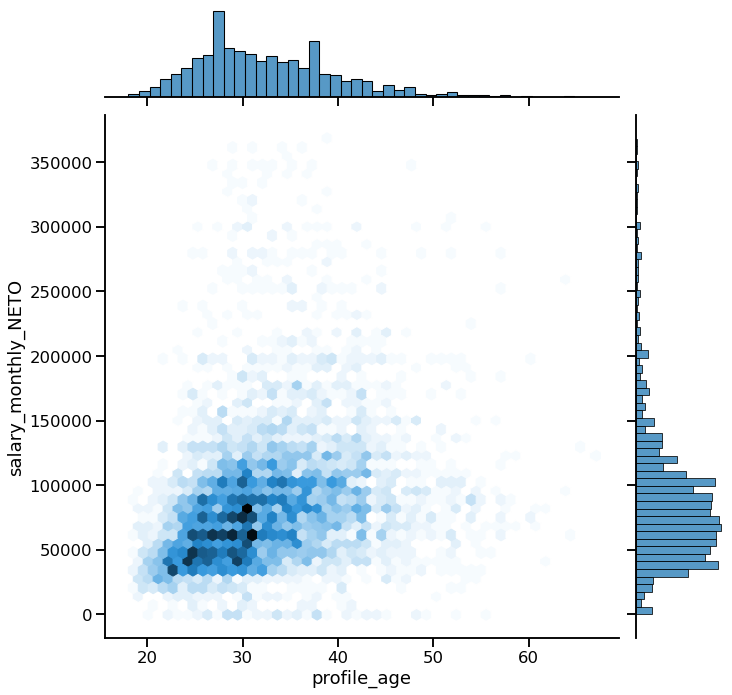

In [14]:
seaborn.jointplot(data=filtered_df, x='profile_age', y='salary_monthly_NETO', kind='hex', height=10)
# Remove scientific notation.
plt.ticklabel_format(style='plain', axis='y')

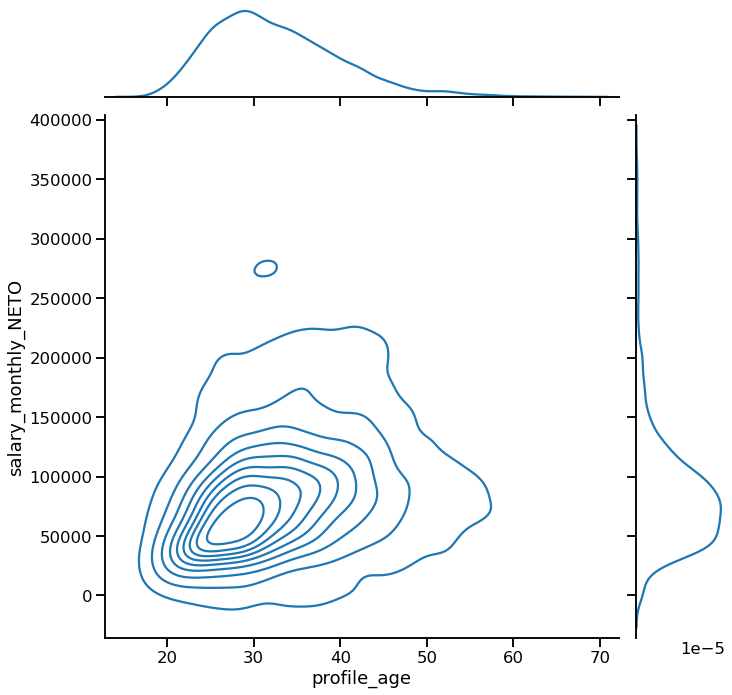

In [15]:
seaborn.jointplot(data=filtered_df, x='profile_age', y='salary_monthly_NETO', kind='kde', height=10)
# Remove scientific notation.
plt.ticklabel_format(style='plain', axis='y')

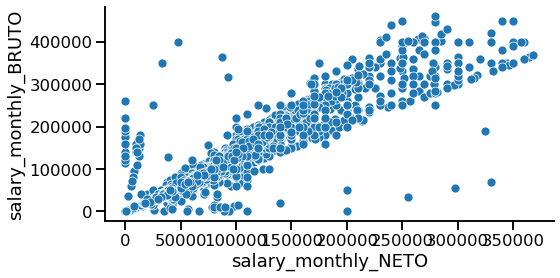

In [16]:
seaborn.pairplot(data=filtered_df,
                 x_vars='salary_monthly_NETO',
                 y_vars='salary_monthly_BRUTO',
                 aspect=2, height=4);

**Pregunta** ¿Cuáles les parecen que son las ventajas de ver de a dos (o más) variables simultáneamente?

**Respuesta** Facilita la realización de un estudio más integrador del problema, y de los correspondientes datos muestrales obtenidos. De alguna forma, se puede ver gráficamente la relación que hay entre las variables seleccionadas. Por ejemplo, es posible determinar si hay una correlación entre las variables `salary_monthly_BRUTO` y `salary_monthly_NETO`.

## Mixtas

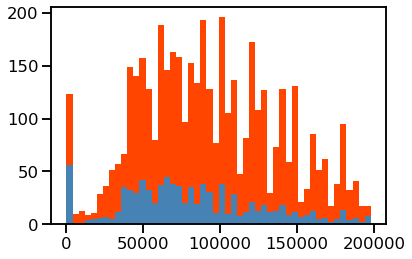

In [17]:
df_Hombres = df_salary[df_salary.profile_gender == 'Hombre']
df_Mujeres = df_salary[df_salary.profile_gender == 'Mujer']

plt.hist(df_Hombres[salary_col], color='orangered', bins=50)
plt.hist(df_Mujeres[salary_col], color='steelblue', bins=50)
plt.show()

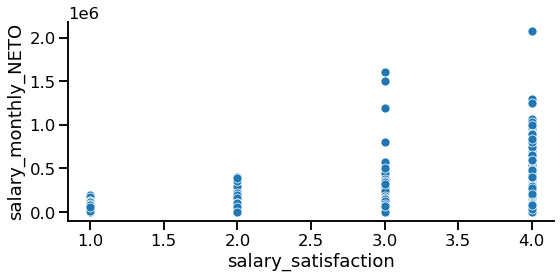

In [18]:
seaborn.pairplot(data=df_age,
                 x_vars='salary_satisfaction',
                 y_vars='salary_monthly_NETO',
                 aspect=2, height=4);

Una desventaja de usar un `pairplot` para variables categóricas es la superposición de los puntos que tienen el mismo valor. Un gráfico que soluciona este problema es el `catplot`.

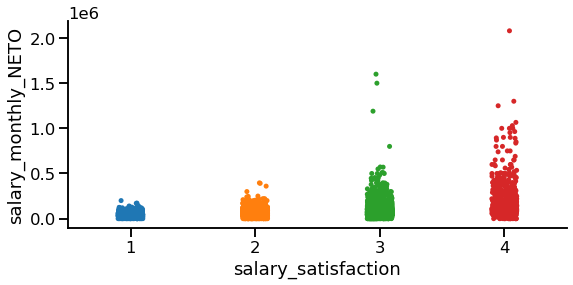

In [19]:
seaborn.catplot(data=df_age,
                x='salary_satisfaction',
                y='salary_monthly_NETO',
                aspect=2, height=4);

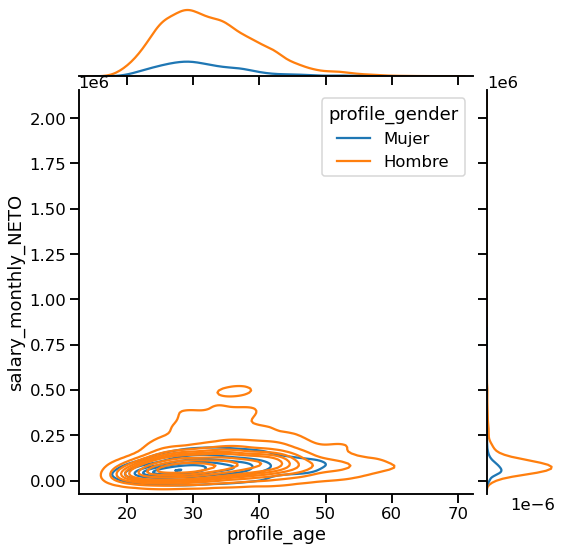

In [20]:
# Al no haber suficientes muestras con el género 'Otros', se descartan los valores.
# En caso contrario, se genera un warning ya que el grupo es demasiado reducido.
# Otra alternativa es emplear `common_norm = False` para graficar de todas maneras.
seaborn.jointplot(data=df_age[df_age.profile_gender != 'Otros'],
                  x='profile_age',
                  y='salary_monthly_NETO',
                  hue='profile_gender',
                  kind='kde', height=8);

# Práctico para resolver en clase

1. Analice las variables `'salary_monthly_BRUTO'` (salario mensual Bruto) y `'salary_monthly_NETO'` (salario mensual Neto) en conjunto, ¿Qué comentarios puede hacer al respecto?

2. Genere una nueva variable `'salary_monthly_DESCUENTOS' = 'salary_monthly_BRUTO'-'salary_monthly_NETO'`, es decir que contenga los descuentos mensuales.
  1. ¿Qué concepto matemático utiliza para entender la nueva variable?
  2. Calcule de dos fomas diferentes la media muestral de dicha variable.
  3. Analice la distribución de los datos, su rango de valores, e interprete, ¿Qué puede estar pasando? ¿Qué propone como solución?

3. Considerando toda la base:
  1. ¿Qué pregunta le interesaría responder?
  2. ¿Qué par de variables le conviene analizar en conjunto? Visualice su distribución conjunta. 
  3. ¿Qué medidas podrían resumir la información de la distribución de esas variables? Visualícelas e interprete cada una.

4. Resuma:
  1. Si está queriendo analizar el comportamiento conjunto de dos variables, ¿Qué gráficos y medidas conviene utilizar? 
  2. ¿Y si ambas variables son numéricas? 
  3. ¿Y si ambas son categóricas? 
  4. ¿Y si una es categórica y la otra numérica? 

**Respuesta 1**

Hay una correlación lineal entre ambas variables, lo cual resulta lógico.
Incluso se puede aprecia que el `salary_monthly_BRUTO` suele ser mayor al `salary_monthly_NETO`, también lógico.

Hay dos observaciones relevantes.

1 - Los puntos arriba de la recta `x = y`, parece que se les descuenta demasiado del salario ¿Por impuestos quizás?.

2 - Los puntos abajo de la recta `x = y`, parece que cobran en negro o no declaran lo suficiente ¿Será que cobran en dolares?.

**Respuesta 2**

A. La nueva variable `salary_monthly_DESCUENTOS` consiste de la **diferencia** entre dos variables numéricas continuas discretizadas, `salary_monthly_BRUTO` y `salary_monthly_NETO`.

In [21]:
interesting_colums = ['salary_in_usd', 'salary_monthly_BRUTO', 'salary_monthly_NETO']

# Se descartan todas las filas donde exista un valor NaN en alguna columna de salario.
new_df = df[interesting_colums].dropna(subset=['salary_monthly_BRUTO', 'salary_monthly_NETO'])

new_df['salary_monthly_DESCUENTOS'] = new_df['salary_monthly_BRUTO'] - new_df['salary_monthly_NETO']
print(f'Dimensiones del DF: {new_df.shape}')

new_df[:3]

Dimensiones del DF: (5883, 4)


,salary_in_usd,salary_monthly_BRUTO,salary_monthly_NETO,salary_monthly_DESCUENTOS
0,NaN,53000.0,43000.0,10000.0
1,NaN,79000.0,63000.0,16000.0
2,NaN,160000.0,127000.0,33000.0


In [22]:
print(f'Media (1° forma): {new_df.salary_monthly_DESCUENTOS.mean()}')
print(f'Media (2° forma): {new_df.salary_monthly_BRUTO.mean() - new_df.salary_monthly_NETO.mean()}')

Media (1° forma): 27073.667276219614
Media (2° forma): 27073.66727621961


In [23]:
# Describo las VAs de los resultados de encuestas.
new_df.describe()

,salary_monthly_BRUTO,salary_monthly_NETO,salary_monthly_DESCUENTOS
count,5.883000e+03,5.883000e+03,5.883000e+03
mean,1.219816e+05,9.490795e+04,2.707367e+04
std,1.206972e+05,9.686226e+04,6.682115e+04
min,1.000000e+00,1.000000e+00,-1.396000e+06
25%,6.100000e+04,5.148000e+04,9.000000e+03
50%,9.500000e+04,7.800000e+04,1.700000e+04
75%,1.430000e+05,1.060000e+05,3.500000e+04
max,2.180000e+06,2.080000e+06,2.022000e+06


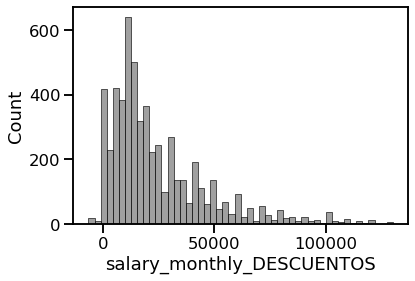

In [24]:
# Aplicamos un filtro para eliminar outliers.
max_limit = new_df.salary_monthly_DESCUENTOS.quantile(.98)
min_limit = new_df.salary_monthly_DESCUENTOS.quantile(.02)

filtered_new_df = new_df[ (new_df.salary_monthly_DESCUENTOS < max_limit)
                        & (new_df.salary_monthly_DESCUENTOS > min_limit)
                        ]

seaborn.histplot(filtered_new_df.salary_monthly_DESCUENTOS, bins=50, color='gray');

**Respuesta 2**

C. Es posible que existan muchos valores erróneos, o situaciones anómalas, en la muestra obtenida. Por lo tanto, aplicamos un filtrado utilizando *percentiles* para reducir un poco el ruido. La gráfica resultante parece ser lógica / coherente.

**Respuesta 3**

A. ¿Un descuento bajo, o negativo, implica que la persona cobra en dólares?

B. Debería ver `'salary_monthly_DESCUENTOS'` y `'salary_in_usd'` para responder a la pregunta.

C. Lamentablemente hay muy pocos datos para concluir una suposición. Y la correlación entre ambas variables parece cercana a cero.

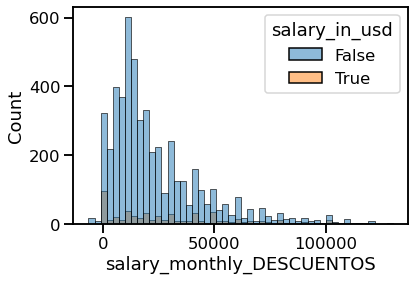

In [25]:
# Defino ambas series por separado.
s_descuentos = filtered_new_df.salary_monthly_DESCUENTOS
s_dolares =filtered_new_df.salary_in_usd.notna()

seaborn.histplot(x=s_descuentos, hue=s_dolares, bins=50, color='gray');

In [26]:
# Correlación entre ambas VAs.
s_descuentos.corr(s_dolares)

0.12589703069615782

**Respuesta 4**

A. Sobre medidas, **Correlación**, para valorar si existe una dependencia *lineal* entre ambas.

Sobre gráficos,

B. Gráfico de puntos, `pairplot`.

C. Tabla de Contingencia, `crosstab`.

D. Gráfico de *Tubos de Ensayo*, `catplot`.